# **Import**

In [ ]:
!pip install ultralytics

!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#**Dataset From Roboflow**

In [ ]:
rf = Roboflow(api_key="lg5WLG6yOfH5NkqD3hlr")
project = rf.workspace("test-0j0bi").project("accident-severity-detection-dataset-srhqy-cdypv")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-Severity-Detection-Dataset-1 in yolov8:: 100%|██████████| 2456/2456 [00:00<00:00, 2929.70it/s]


# **Training Model Yolov8m**

In [ ]:
os.environ['WANDB_DISABLED'] = 'true'

In [ ]:
model = YOLO("yolov8m.pt")
results = model.train(
    data="/content/Accident-Severity-Detection-Dataset-1/data.yaml",
    epochs=50,
    optimizer="SGD",
    lr0=0.0001,
    imgsz=640,
    seed=42)

100%|██████████| 49.7M/49.7M [00:00<00:00, 332MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Accident-Severity-Detection-Dataset-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.1MB/s]


AMP: checks passed ✅


train: Scanning /content/Accident-Severity-Detection-Dataset-1/train/labels... 852 images, 2 backgrounds, 0 corrupt: 100%|██████████| 852/852 [00:00<00:00, 1857.29it/s]

train: New cache created: /content/Accident-Severity-Detection-Dataset-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<00:00, 918.05it/s] 

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.81G      1.227       3.29      1.615         10        640: 100%|██████████| 54/54 [00:29<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        186        189     0.0795      0.206      0.085     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.76G      1.188      2.713       1.56          6        640: 100%|██████████| 54/54 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        186        189      0.368      0.233      0.204      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.64G      1.149      2.403      1.522          5        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        186        189      0.251       0.34      0.258      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.72G      1.117      2.201      1.493          5        640: 100%|██████████| 54/54 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        186        189      0.319      0.456      0.358      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.76G      1.073      1.984      1.476         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        186        189      0.389      0.482      0.428       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.73G      1.026      1.841      1.439          9        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        186        189      0.439      0.545      0.467      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.75G      1.006      1.725      1.415         10        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        186        189      0.391      0.599      0.483      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.73G     0.9492      1.618      1.378         10        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        186        189      0.459      0.576      0.499       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.76G      0.967      1.538      1.368          8        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        186        189      0.477      0.583      0.521      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.74G     0.9155      1.466      1.347         10        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        186        189      0.459      0.583      0.551        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.75G     0.8854      1.412        1.3          4        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        186        189      0.456      0.702       0.58      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.74G      0.904      1.389      1.333          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        186        189      0.522      0.622      0.611      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.77G     0.8813       1.34      1.306          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        186        189      0.481      0.653      0.613      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.73G     0.8543      1.312      1.296          9        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        186        189      0.537       0.66      0.644      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.75G     0.8842      1.346        1.3          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        186        189      0.583      0.634      0.653      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.74G     0.8651      1.256      1.296          4        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        186        189      0.585      0.693      0.674      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.74G     0.8618      1.242      1.289          5        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all        186        189      0.518      0.714      0.672       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.72G     0.8106       1.21      1.258          9        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        186        189      0.578      0.683      0.687      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.75G     0.8377       1.19      1.258         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        186        189      0.582      0.674      0.682       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.72G     0.8344       1.19      1.263          7        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        186        189      0.604      0.686      0.697      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.75G     0.8309      1.143      1.257         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        186        189      0.655      0.641       0.71      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.74G     0.8265      1.156      1.258          6        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        186        189      0.613      0.703       0.71      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.75G     0.8065      1.144      1.227          9        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        186        189      0.645      0.672      0.711      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.74G      0.837      1.117      1.255         10        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189      0.606       0.73      0.726      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.76G     0.7961      1.062      1.225          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        186        189        0.6      0.733      0.737      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.73G     0.7883      1.058      1.237          6        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        186        189      0.643      0.676      0.737       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.75G     0.8407      1.103      1.263          8        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        186        189      0.702      0.652      0.739      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.73G     0.7397      1.022      1.193          5        640: 100%|██████████| 54/54 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        186        189      0.659      0.683      0.748      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.76G     0.7806      1.022      1.227          8        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        186        189      0.691      0.711      0.762      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.74G     0.7916      1.017      1.237          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        186        189      0.707      0.682      0.768      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.74G     0.7435     0.9928      1.201          9        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        186        189      0.731      0.678      0.764      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.74G     0.7783          1      1.215         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        186        189      0.738      0.685       0.77       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.76G     0.7876      1.012      1.222          6        640: 100%|██████████| 54/54 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        186        189      0.805      0.647      0.776      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.73G     0.7587     0.9621      1.212          7        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        186        189      0.717       0.69      0.765      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.75G     0.8017      0.971      1.235          7        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        186        189      0.731      0.701      0.784      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.72G     0.8135      1.021      1.238          3        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        186        189      0.696      0.727      0.782      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.75G      0.787     0.9812      1.227          7        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all        186        189      0.707      0.707      0.777      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.73G     0.7876     0.9636      1.214          9        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        186        189      0.734      0.703       0.78      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.75G     0.7681     0.9399      1.204          5        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        186        189       0.77      0.664      0.777      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.72G     0.7668     0.9405      1.209         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        186        189      0.759      0.683       0.78      0.614


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.76G     0.6149     0.8971      1.105          4        640: 100%|██████████| 54/54 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        186        189      0.754      0.654      0.753      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.74G     0.6294     0.8753      1.108          4        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        186        189      0.777      0.656      0.755      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.75G     0.6096      0.833      1.083          5        640: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        186        189      0.788      0.651      0.764      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.73G     0.6141     0.8243      1.104          5        640: 100%|██████████| 54/54 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        186        189      0.809      0.635      0.764      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.75G     0.5754     0.7923       1.07          4        640: 100%|██████████| 54/54 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        186        189      0.831      0.619      0.767      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.73G     0.6092     0.8117       1.09          4        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        186        189      0.756      0.656      0.772      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.74G      0.607     0.8289      1.087          4        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        186        189      0.783       0.65      0.773      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.73G     0.6055     0.8105        1.1          5        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        186        189      0.845      0.626      0.767      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.75G     0.5974     0.7862      1.091          4        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        186        189      0.757      0.669       0.77      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.74G     0.6042     0.7945      1.094          4        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        186        189      0.762      0.677      0.772      0.615



50 epochs completed in 0.449 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]


                   all        186        189      0.728      0.705      0.784       0.62
              moderate         66         66      0.721      0.588      0.723      0.569
                severe        120        123      0.735      0.821      0.846       0.67
Speed: 0.2ms preprocess, 9.7ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


# **conf=0.25**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.25)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]


                   all        186        189      0.731      0.702      0.755      0.626
              moderate         66         66       0.72      0.584      0.689      0.572
                severe        120        123      0.743      0.821      0.822      0.681
Speed: 0.3ms preprocess, 22.0ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbd3107bc40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.25, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<00:00, 716.72it/s]

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]


                   all        184        191      0.756       0.64      0.713      0.572
              moderate         84         84      0.777      0.452      0.596      0.489
                severe        100        107      0.735      0.828      0.829      0.655
Speed: 0.2ms preprocess, 22.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbd30dbdc60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.25, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 1 moderate, 1 severe, 37.0ms
Speed: 3.2ms preprocess, 37.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

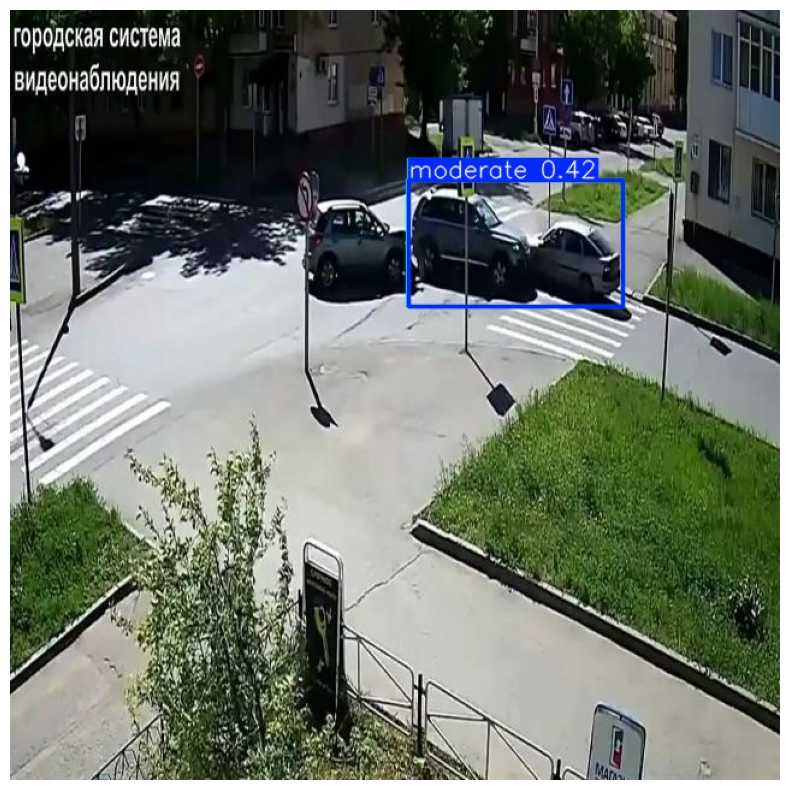

In [ ]:
image_path = "/content/runs/detect/predict/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

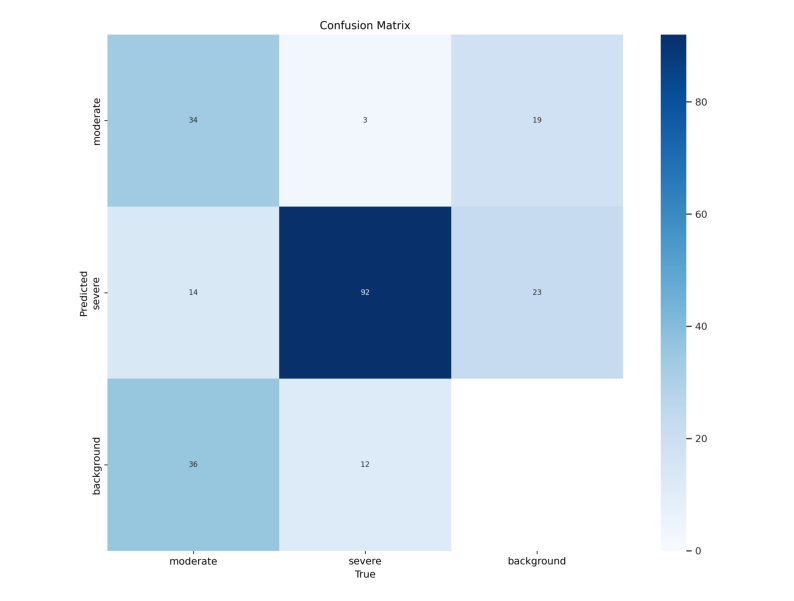

In [ ]:
image_path = '/content/runs/detect/val2/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# **conf=0.5**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.5)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]


                   all        186        189      0.811      0.604      0.732      0.624
              moderate         66         66      0.821      0.485      0.674      0.575
                severe        120        123      0.802      0.724       0.79      0.673
Speed: 0.3ms preprocess, 22.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbd15fe14e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.5, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]


                   all        184        191      0.832      0.517        0.7      0.588
              moderate         84         84      0.875      0.333      0.617       0.53
                severe        100        107      0.789      0.701      0.783      0.647
Speed: 0.4ms preprocess, 23.0ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbd31395bd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.5, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 (no detections), 37.0ms
Speed: 3.6ms preprocess, 37.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

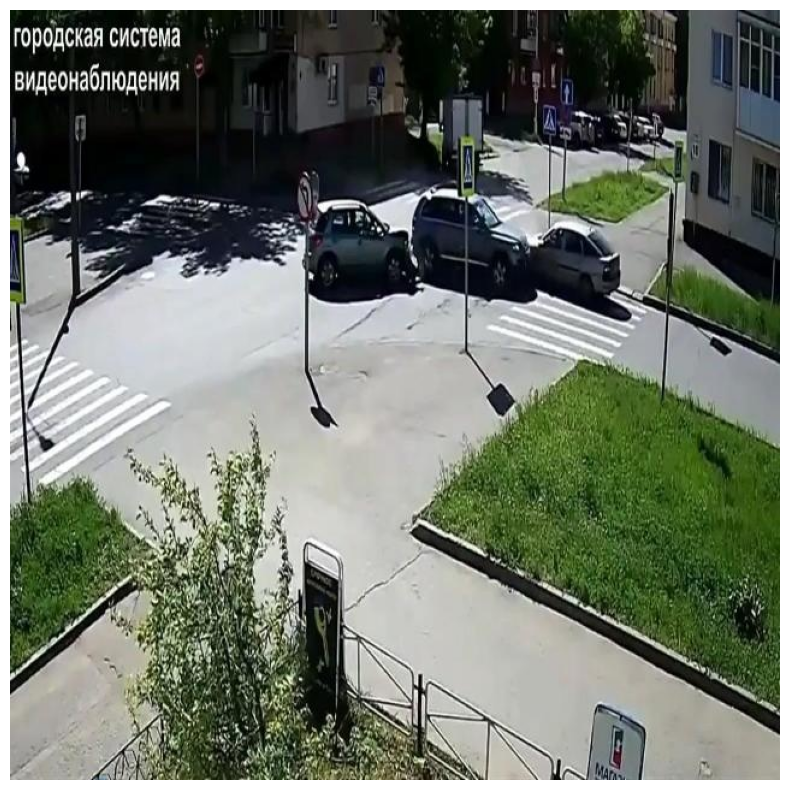

In [ ]:
image_path = "/content/runs/detect/predict2/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

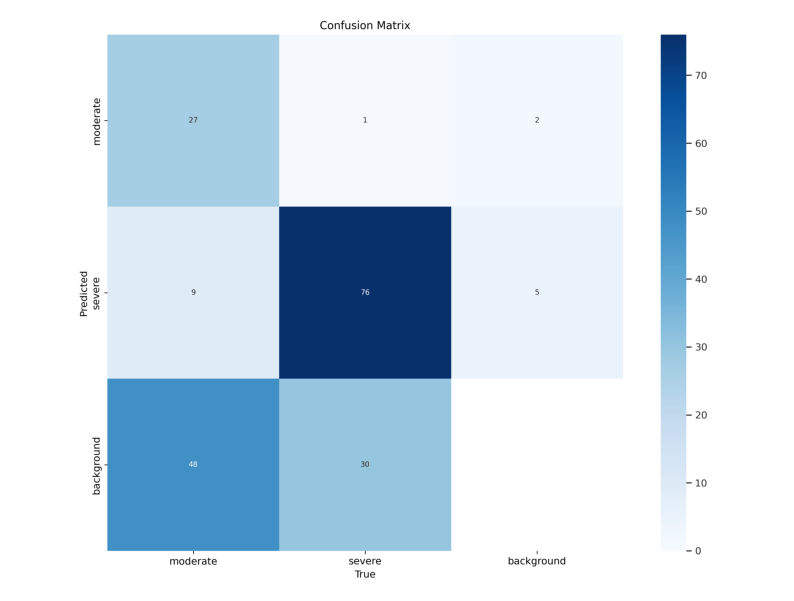

In [ ]:
image_path = '/content/runs/detect/val4/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# **conf=0.75**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.75)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]


                   all        186        189      0.922       0.39       0.66      0.571
              moderate         66         66      0.938      0.227      0.585      0.501
                severe        120        123      0.907      0.553      0.734      0.641
Speed: 0.6ms preprocess, 22.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbd15445c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.75, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]


                   all        184        191      0.938      0.338      0.649      0.564
              moderate         84         84          1      0.143      0.571      0.511
                severe        100        107      0.877      0.533      0.726      0.616
Speed: 0.6ms preprocess, 22.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbd3017a7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.75, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 (no detections), 37.0ms
Speed: 3.3ms preprocess, 37.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

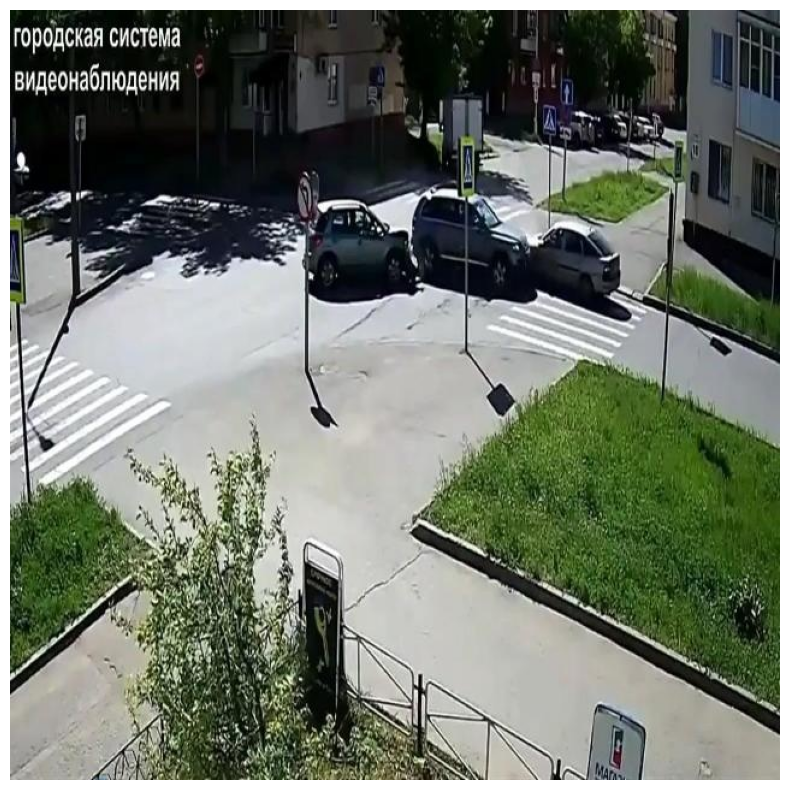

In [ ]:
image_path = "/content/runs/detect/predict3/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

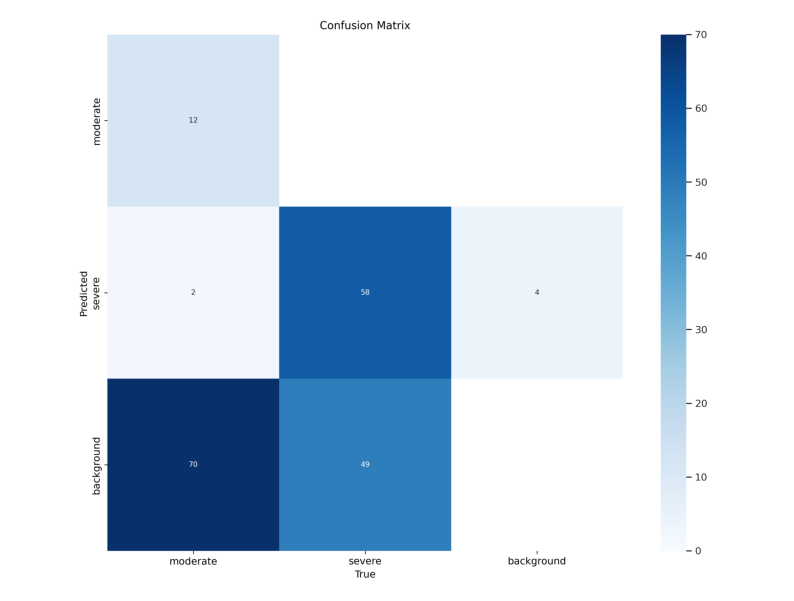

In [ ]:
image_path = '/content/runs/detect/val6/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import shutil

shutil.make_archive('runs', 'zip', '/content/runs')


'/content/runs.zip'

In [ ]:
from google.colab import files

files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>